<a href="https://colab.research.google.com/github/xdbsgk/test/blob/master/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget http://log-sharing.dreamhosters.com/SotM30-anton.log.gz

--2023-06-05 06:09:02--  http://log-sharing.dreamhosters.com/SotM30-anton.log.gz
Resolving log-sharing.dreamhosters.com (log-sharing.dreamhosters.com)... 208.113.172.207
Connecting to log-sharing.dreamhosters.com (log-sharing.dreamhosters.com)|208.113.172.207|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://log-sharing.dreamhosters.com/SotM30-anton.log.gz [following]
--2023-06-05 06:09:03--  https://log-sharing.dreamhosters.com/SotM30-anton.log.gz
Connecting to log-sharing.dreamhosters.com (log-sharing.dreamhosters.com)|208.113.172.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3905534 (3.7M) [application/gzip]
Saving to: ‘SotM30-anton.log.gz’

SotM30-anton.log.gz 100%[===================>]   3.72M  2.50MB/s    in 1.5s    

2023-06-05 06:09:05 (2.50 MB/s) - ‘SotM30-anton.log.gz’ saved [3905534/3905534]



In [6]:
!gzip -d ./SotM30-anton.log.gz

gzip: ./SotM30-anton.log already exists; do you wish to overwrite (y or n)? y


-> row data 수집 과정 완료

In [7]:
def parse_log(log):
  log_split = log.split(': ')
  attrs = {'time': log_split[0]}

  if len(log_split) == 3:
    attrs['state'] = log_split[1]
    conn_info = log_split[2].split()
  else:
    pos_info = log_split[1].find('IN=')
    attrs['state'] = log_split[1][:pos_info]
    conn_info = log_split[1][pos_info:].split()
  
  for e in conn_info:
    e_split = e.split('=')

    if len(e_split) == 2:
      attrs[e_split[0]] = e_split[1]
    else:
      if e_split[0] == 'DF':
        attrs['DF'] = '1'
      else:
        attrs['etc.'] = e_split[0]

  return attrs

- time 정보 그대로 읽음.
- connection state : low_split[1]을 집어넣음
- 빈칸을 기준으로 정리가 됨
- 등호(=)를 기준으로 split
- 길이가 2인 경우에 대해, 첫번쨰-> index, 값 대입.
- else는 없어도 정상적으로 동작함!

In [8]:
import collections
import numpy as np
import pandas as pd

parsed_logs = []

with open('./SotM30-anton.log') as f :
  for line in f.readlines():
    parsed = parse_log(line)
    parsed_logs.append(parsed)

df = pd.DataFrame.from_dict(parsed_logs)
df

,time,state,IN,PHYSIN,OUT,PHYSOUT,SRC,DST,LEN,TOS,...,DPT,WINDOW,RES,etc.,URGP,DF,TYPE,CODE,SEQ,MAC
0,Feb 1 00:00:02 bridge kernel,INBOUND TCP,br0,eth0,br0,eth1,192.150.249.87,11.11.11.84,40,0x00,...,6129,16384,0x00,SYN,0,NaN,NaN,NaN,NaN,NaN
1,Feb 1 00:00:02 bridge kernel,INBOUND TCP,br0,eth0,br0,eth1,24.17.237.70,11.11.11.95,40,0x00,...,6129,16384,0x00,SYN,0,NaN,NaN,NaN,NaN,NaN
2,Feb 1 00:00:07 bridge kernel,INBOUND TCP,br0,eth0,br0,eth1,192.150.249.87,11.11.11.85,40,0x00,...,6129,16384,0x00,SYN,0,NaN,NaN,NaN,NaN,NaN
3,Feb 1 00:00:17 bridge kernel,INBOUND TCP,br0,eth0,br0,eth1,192.150.249.87,11.11.11.87,40,0x00,...,6129,16384,0x00,SYN,0,NaN,NaN,NaN,NaN,NaN
4,Feb 1 00:00:24 bridge kernel,INBOUND TCP,br0,eth0,br0,eth1,24.17.237.70,11.11.11.100,40,0x00,...,6129,16384,0x00,SYN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307519,Feb 27 14:35:06 bridge kernel,OUTG CONN TCP,br0,eth1,br0,eth0,11.11.11.71,220.210.69.62,40,0x00,...,1325,6432,0x00,ACK,0,1,NaN,NaN,NaN,NaN
307520,Feb 27 14:36:12 bridge kernel,INBOUND UDP,br0,eth0,br0,eth1,194.250.174.113,11.11.11.67,49,0x00,...,1812,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
307521,Feb 27 14:39:04 bridge kernel,INBOUND UDP,br0,eth0,br0,eth1,209.178.173.93,11.11.11.85,384,0x00,...,1434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307522,Feb 27 14:39:11 bridge kernel,INBOUND TCP,br0,eth0,br0,eth1,206.130.246.2,11.11.11.100,40,0x00,...,80,17520,0x00,FIN,0,1,NaN,NaN,NaN,NaN


dataset loading 해보기.
- numpy : array 연산 위해 사용함.
- 파서로그 함수를 이용해 parsing 되어진 데이터 확인이 가능하다.
- 현재 디렉토리의 로그파일을 읽어 각 라인에 대해 parsing된 것들을 parsed_log에 append해 생성된 데이터를 pandas로 데이터 프레임을 씌움.
- dictionary 데이터 프레임으로 변환함! (from_dict 이용)
- 식별자를 판단하기 위한 값들임?(조교님설명)

In [9]:
key = df[['time', 'state', 'SRC', 'DST', 'MAC']].copy()
key

,time,state,SRC,DST,MAC
0,Feb 1 00:00:02 bridge kernel,INBOUND TCP,192.150.249.87,11.11.11.84,NaN
1,Feb 1 00:00:02 bridge kernel,INBOUND TCP,24.17.237.70,11.11.11.95,NaN
2,Feb 1 00:00:07 bridge kernel,INBOUND TCP,192.150.249.87,11.11.11.85,NaN
3,Feb 1 00:00:17 bridge kernel,INBOUND TCP,192.150.249.87,11.11.11.87,NaN
4,Feb 1 00:00:24 bridge kernel,INBOUND TCP,24.17.237.70,11.11.11.100,NaN
...,...,...,...,...,...
307519,Feb 27 14:35:06 bridge kernel,OUTG CONN TCP,11.11.11.71,220.210.69.62,NaN
307520,Feb 27 14:36:12 bridge kernel,INBOUND UDP,194.250.174.113,11.11.11.67,NaN
307521,Feb 27 14:39:04 bridge kernel,INBOUND UDP,209.178.173.93,11.11.11.85,NaN
307522,Feb 27 14:39:11 bridge kernel,INBOUND TCP,206.130.246.2,11.11.11.100,NaN


key 값을 변환 ?

In [10]:
data = df[[e for e in list(df.columns) if e not in ['time', 'state', 'SRC', 'DST', 'MAC']]].copy()
data

,IN,PHYSIN,OUT,PHYSOUT,LEN,TOS,PREC,TTL,ID,PROTO,SPT,DPT,WINDOW,RES,etc.,URGP,DF,TYPE,CODE,SEQ
0,br0,eth0,br0,eth1,40,0x00,0x00,110,12973,TCP,220,6129,16384,0x00,SYN,0,NaN,NaN,NaN,NaN
1,br0,eth0,br0,eth1,40,0x00,0x00,113,27095,TCP,220,6129,16384,0x00,SYN,0,NaN,NaN,NaN,NaN
2,br0,eth0,br0,eth1,40,0x00,0x00,110,13801,TCP,220,6129,16384,0x00,SYN,0,NaN,NaN,NaN,NaN
3,br0,eth0,br0,eth1,40,0x00,0x00,110,15432,TCP,220,6129,16384,0x00,SYN,0,NaN,NaN,NaN,NaN
4,br0,eth0,br0,eth1,40,0x00,0x00,113,31168,TCP,220,6129,16384,0x00,SYN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307519,br0,eth1,br0,eth0,40,0x00,0x00,64,50684,TCP,80,1325,6432,0x00,ACK,0,1,NaN,NaN,NaN
307520,br0,eth0,br0,eth1,49,0x00,0x00,45,0,UDP,1812,1812,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
307521,br0,eth0,br0,eth1,384,0x00,0x00,111,4912,UDP,1035,1434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307522,br0,eth0,br0,eth1,40,0x00,0x00,51,26589,TCP,2577,80,17520,0x00,FIN,0,1,NaN,NaN,NaN


다섯 개를 제외한 나머지 필드를 저장함.
(columns에 없는 것들에 대해 복사)

In [11]:
non_numeric_cols = ['IN', 'PHYSIN', 'OUT', 'PHYSOUT', 'PROTO', 'etc.']
hex_numeric_cols = ['TOS', 'PREC', 'RES']
numeric_cols = ['TTL', 'ID', 'SPT', 'DPT', 'WINDOW', 'URGP', 'DF', 'TYPE', 'CODE', 'SEQ']

- 해당 값들을 프로토타입으로 변환해주어야 함.
- 데이터 처리를 위해 위와 같은 과정을 수행함 (데이터를 직접 살펴보고 구분이 가능함)

In [12]:
non_numeric_data = []
non_numeric_map = {}

for col in non_numeric_cols:
  factorized, name = pd.factorize(data[col])

  non_numeric_data.append(factorized.astype(float)) # convert categorical data to numeric

  non_numeric_map[col] = name

non_numeric_data = np.array(non_numeric_data)
non_numeric_data = pd.DataFrame(np.transpose(non_numeric_data), columns=non_numeric_cols)
non_numeric_data

,IN,PHYSIN,OUT,PHYSOUT,PROTO,etc.
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
307519,0.0,1.0,0.0,1.0,0.0,4.0
307520,0.0,0.0,0.0,0.0,2.0,-1.0
307521,0.0,0.0,0.0,0.0,2.0,-1.0
307522,0.0,0.0,0.0,0.0,0.0,3.0


In [13]:
data = data.fillna('-1') # fill all NaN to -1

hex_numeric_data = []

for col in hex_numeric_cols:
  converted = data[col].apply(float.fromhex)
  hex_numeric_data.append(converted)

hex_numeric_data = np.array(hex_numeric_data)
hex_numeric_data = pd.DataFrame(np.transpose(hex_numeric_data), columns=hex_numeric_cols)
hex_numeric_data

,TOS,PREC,RES
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
307519,0.0,0.0,0.0
307520,0.0,0.0,-1.0
307521,0.0,0.0,-1.0
307522,0.0,0.0,0.0


In [14]:
numeric_data = []

for col in numeric_cols:
  converted = data[col].apply(float)
  numeric_data.append(converted)

numeric_data = np.array(numeric_data)
numeric_data = pd.DataFrame(np.transpose(numeric_data), columns=numeric_cols)
numeric_data

,TTL,ID,SPT,DPT,WINDOW,URGP,DF,TYPE,CODE,SEQ
0,110.0,12973.0,220.0,6129.0,16384.0,0.0,-1.0,-1.0,-1.0,-1.0
1,113.0,27095.0,220.0,6129.0,16384.0,0.0,-1.0,-1.0,-1.0,-1.0
2,110.0,13801.0,220.0,6129.0,16384.0,0.0,-1.0,-1.0,-1.0,-1.0
3,110.0,15432.0,220.0,6129.0,16384.0,0.0,-1.0,-1.0,-1.0,-1.0
4,113.0,31168.0,220.0,6129.0,16384.0,0.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
307519,64.0,50684.0,80.0,1325.0,6432.0,0.0,1.0,-1.0,-1.0,-1.0
307520,45.0,0.0,1812.0,1812.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
307521,111.0,4912.0,1035.0,1434.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
307522,51.0,26589.0,2577.0,80.0,17520.0,0.0,1.0,-1.0,-1.0,-1.0


In [15]:
converted_data = pd.concat([non_numeric_data, hex_numeric_data, numeric_data], axis=1)
converted_data

,IN,PHYSIN,OUT,PHYSOUT,PROTO,etc.,TOS,PREC,RES,TTL,ID,SPT,DPT,WINDOW,URGP,DF,TYPE,CODE,SEQ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,12973.0,220.0,6129.0,16384.0,0.0,-1.0,-1.0,-1.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,27095.0,220.0,6129.0,16384.0,0.0,-1.0,-1.0,-1.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,13801.0,220.0,6129.0,16384.0,0.0,-1.0,-1.0,-1.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,15432.0,220.0,6129.0,16384.0,0.0,-1.0,-1.0,-1.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,31168.0,220.0,6129.0,16384.0,0.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307519,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,64.0,50684.0,80.0,1325.0,6432.0,0.0,1.0,-1.0,-1.0,-1.0
307520,0.0,0.0,0.0,0.0,2.0,-1.0,0.0,0.0,-1.0,45.0,0.0,1812.0,1812.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
307521,0.0,0.0,0.0,0.0,2.0,-1.0,0.0,0.0,-1.0,111.0,4912.0,1035.0,1434.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
307522,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,51.0,26589.0,2577.0,80.0,17520.0,0.0,1.0,-1.0,-1.0,-1.0


-> data 전처리 과정이 끝남!

In [16]:
from sklearn.ensemble import IsolationForest

model_if = IsolationForest(n_estimators=30).fit(converted_data)
pred_if = model_if.predict(converted_data)
cnt_if = collections.Counter(pred_if)
print(cnt_if)

Counter({1: 231961, -1: 75563})


Random Forest 모델로 변환한 데이터를 활용해, 학습시킴.
-> -1 : (Anomaly)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(converted_data)
scaled_data

array([[0.5, 0.5, 0.5, ..., 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, ..., 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, ..., 0. , 0. , 0. ],
       ...,
       [0.5, 0.5, 0.5, ..., 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, ..., 0. , 0. , 0. ],
       [0.5, 1. , 0.5, ..., 0. , 0. , 0. ]])

rescaling시키는 과정
- 차원 축소를 시키면 더 정확성이 높아짐 
- 성능 강화됨

In [18]:
from sklearn.decomposition import PCA

compressed_data = PCA(n_components=3).fit_transform(scaled_data)
compressed_data

array([[ 0.55664192,  0.11791115,  0.18676901],
       [ 0.50626378,  0.06360194,  0.36892694],
       [ 0.55368485,  0.11462676,  0.19737708],
       ...,
       [ 0.80591465, -0.11919434,  0.05328722],
       [-0.13617403, -0.11345957, -0.13150846],
       [-0.13088405, -0.49269331,  0.03631041]])

- 다시 데이터 변환 (scaled_data를 축소된 데이터 형태로 나타낸다)
- 19개 -> 3개로 축소됨 (LOF의 성능을 MAX시키면서 !!)

In [19]:
from sklearn.neighbors import LocalOutlierFactor

model_lof = LocalOutlierFactor(n_neighbors=30) 
pred_lof = model_lof.fit_predict(compressed_data) 
cnt_lof = collections.Counter(pred_lof) 
print(cnt_lof)

Counter({1: 272607, -1: 34917})


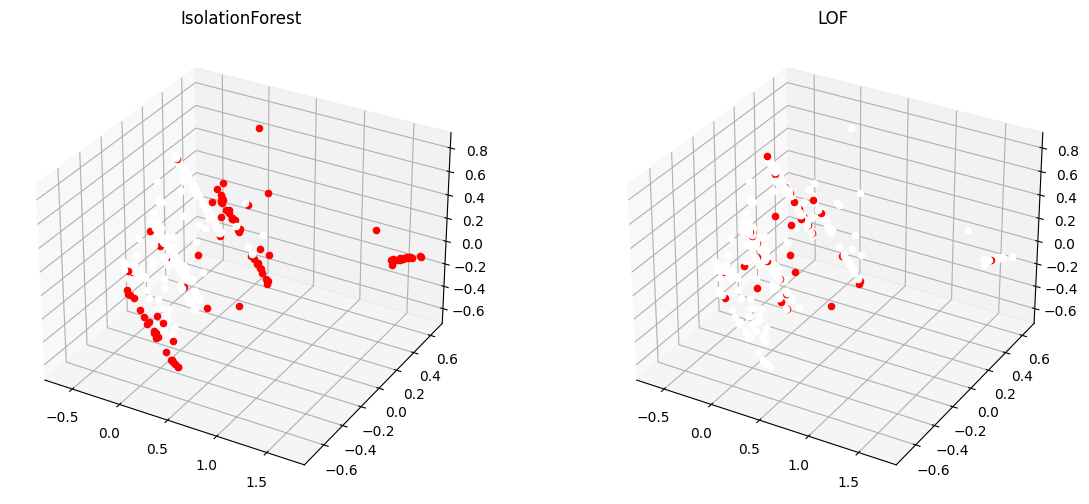

In [21]:
import matplotlib.pyplot as plt # matplotlib을 이용해 결과가 잘 보이도록 3D 모델링

fig = plt.figure(figsize=(14, 6))
res_if = fig.add_subplot(121, projection='3d') 
res_if.set_title('IsolationForest')
res_lof = fig.add_subplot(122, projection='3d') 
res_lof.set_title('LOF')
for i in range(0, len(compressed_data), 1000):
  res_if.scatter(compressed_data[i][0], compressed_data[i][1], compressed_data[i][2], c='white' if pred_if[i] == 1 else 'red')
  res_lof.scatter(compressed_data[i][0], compressed_data[i][1], compressed_data[i][2], c='white' if pred_lof[i] == 1 else 'red') 
plt.show()

[OCSVM 과제]

In [20]:
from sklearn import svm

clf = svm.OneClassSVM(nu = 0.01, kernel = 'rbf', gamma = 0.00001)
clf.fit(compressed_data)
pred_ocsvm = clf.predict(compressed_data)
cnt_ocsvm = collections.Counter(pred_ocsvm)
print(cnt_ocsvm)

Counter({1: 305319, -1: 2205})


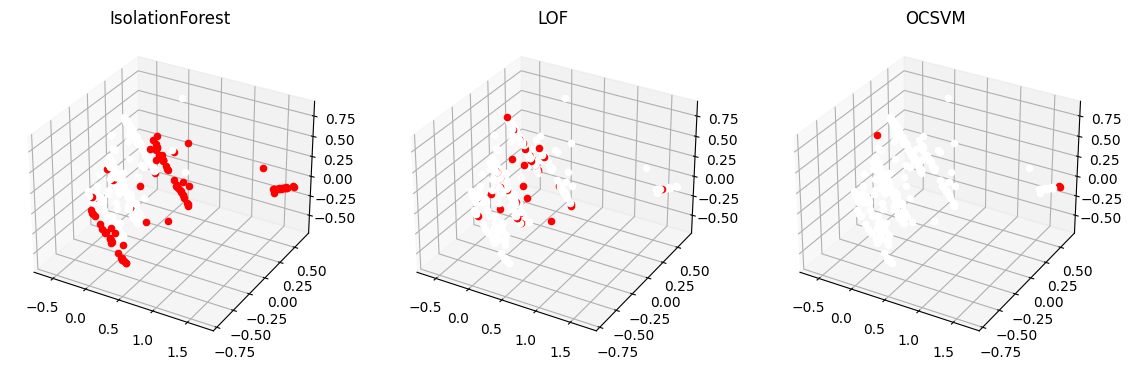

In [23]:
import matplotlib.pyplot as plt # matplotlib을 이용해 결과가 잘 보이도록 3D 모델링

fig = plt.figure(figsize=(14, 6))
res_if = fig.add_subplot(131, projection='3d') 
res_if.set_title('IsolationForest')
res_lof = fig.add_subplot(132, projection='3d') 
res_lof.set_title('LOF')
res_ocsvm = fig.add_subplot(133, projection='3d')
res_ocsvm.set_title('OCSVM')
for i in range(0, len(compressed_data), 1000):
  res_if.scatter(compressed_data[i][0], compressed_data[i][1], compressed_data[i][2], c='white' if pred_if[i] == 1 else 'red')
  res_lof.scatter(compressed_data[i][0], compressed_data[i][1], compressed_data[i][2], c='white' if pred_lof[i] == 1 else 'red') 
  res_ocsvm.scatter(compressed_data[i][0], compressed_data[i][1], compressed_data[i][2], c='white' if pred_ocsvm[i] == 1 else 'red')
plt.show()